In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
# Generate skewed dataset
def generate_skewed_dataset(size=100):
    np.random.seed(42)
    black_data = np.random.normal(50, 5, size // 5)  # Small "black" cluster
    white_data = np.random.normal(200, 15, size * 4 // 5)  # Large "white" cluster
    dataset = np.concatenate((black_data, white_data))
    np.random.shuffle(dataset)
    return dataset

# Perform DBSCAN clustering
def classify_data_with_dbscan(data, eps=10, min_samples=5):
    data_reshaped = data.reshape(-1, 1)  # Reshape for DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_reshaped)
    return labels

In [3]:
# Plot results
def plot_dbscan_results(data, labels):
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_data = data[labels == label]
        plt.scatter(cluster_data, [label] * len(cluster_data), label=f'Cluster {label}')
    plt.title("DBSCAN Clustering for Skewed Classes")
    plt.xlabel("Sensor Readings")
    plt.ylabel("Clusters")
    plt.legend()
    plt.show()

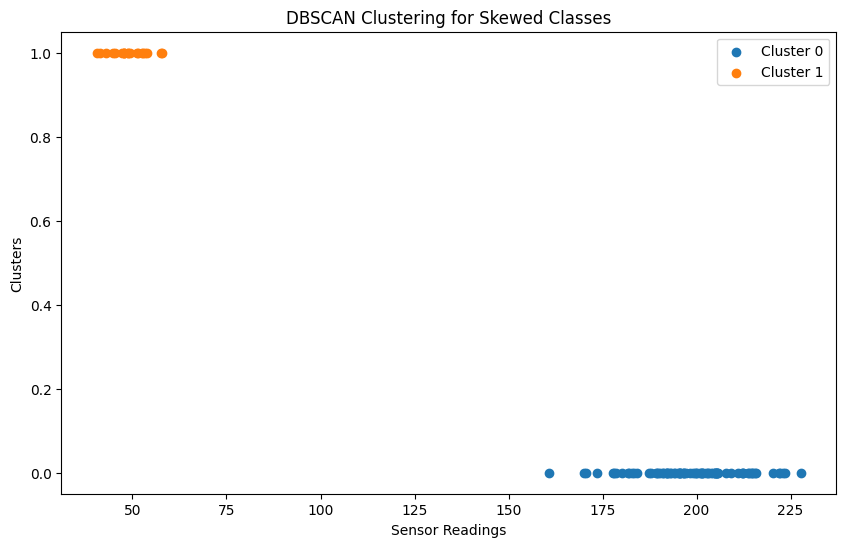

In [4]:
# Generate dataset
dataset = generate_skewed_dataset(size=100)

# Perform DBSCAN clustering
labels = classify_data_with_dbscan(dataset, eps=15, min_samples=3)

# Plot results
plot_dbscan_results(dataset, labels)

# Display dataset and labels for verification
# dataset, labels
